In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
dataset = pd.read_excel('diabetes_data_AIDA.xlsx', sheet_name='Train')

In [87]:
print(dataset.head())

    Age Gender Polyuria Polydipsia  ... muscle stiffness Alopecia Obesity     class
0  40.0   Male       No        Yes  ...              Yes      Yes     Yes  Positive
1  58.0   Male       No         No  ...               No      Yes      No  Positive
2  41.0   Male      Yes         No  ...              Yes      Yes      No  Positive
3   NaN   Male       No         No  ...               No       No      No  Positive
4  60.0   Male      Yes        Yes  ...              Yes      Yes     Yes  Positive

[5 rows x 17 columns]


In [88]:
X_train = dataset.iloc[:, :-1]
y_train = dataset.iloc[:, -1].values

In [89]:
print(X_train.isna().sum())

Age                   33
Gender                 0
Polyuria               0
Polydipsia             0
sudden weight loss     0
weakness               9
Polyphagia             0
Genital thrush         7
visual blurring        7
Itching                0
Irritability           8
delayed healing        0
partial paresis        4
muscle stiffness       0
Alopecia               0
Obesity                0
dtype: int64


Age :- 


(array([  1.,  39.,  77.,  90.,  79., 108.,  41.,  27.,   1.,   4.]),
 array([16. , 23.4, 30.8, 38.2, 45.6, 53. , 60.4, 67.8, 75.2, 82.6, 90. ]),
 <a list of 10 Patch objects>)

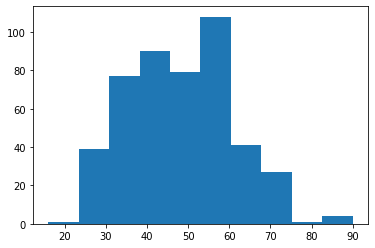

In [90]:
print("Age :- ")
plt.hist(X_train['Age'])                        # Mean
# print("weakness :- ")
# (X_train['weakness'] == 'Yes').sum()              # 283
# (X_train['weakness'] == 'No').sum()               #208
# print("Genital thrush :- ")
# (X_train['Genital thrush'] == 'Yes').sum()          # 112
# (X_train['Genital thrush'] == 'No').sum()           # 381
# print("visual blurring :- ")
# (X_train['visual blurring'] == 'Yes').sum()         # 221
# (X_train['visual blurring'] == 'No').sum()            # 272
# print("Irritability :- ")
# (X_train['Irritability'] == 'Yes').sum()              # 121
# (X_train['Irritability'] == 'No').sum()                 #371
# print("partial paresis :- ")
# (X_train['partial paresis'] == 'Yes').sum()             # 213
# (X_train['partial paresis'] == 'No').sum()              # 283

In [91]:
X_train['weakness'].fillna(value=X_train['weakness'].mode()[0], inplace=True)
X_train['Genital thrush'].fillna(value=X_train['Genital thrush'].mode()[0], inplace=True)
X_train['visual blurring'].fillna(value=X_train['visual blurring'].mode()[0], inplace=True)
X_train['Irritability'].fillna(value=X_train['Irritability'].mode()[0], inplace=True)
X_train['partial paresis'].fillna(value=X_train['partial paresis'].mode()[0], inplace=True)

In [92]:
X_train['Age'].fillna(value=X_train['Age'].mean(), inplace=True)
print(X_train.isna().sum())

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
dtype: int64


In [93]:
print(X_train)

           Age  Gender Polyuria  ... muscle stiffness Alopecia Obesity
0    40.000000    Male       No  ...              Yes      Yes     Yes
1    58.000000    Male       No  ...               No      Yes      No
2    41.000000    Male      Yes  ...              Yes      Yes      No
3    48.109208    Male       No  ...               No       No      No
4    60.000000    Male      Yes  ...              Yes      Yes     Yes
..         ...     ...      ...  ...              ...      ...     ...
495  39.000000  Female      Yes  ...               No       No      No
496  48.000000  Female      Yes  ...               No       No      No
497  58.000000  Female      Yes  ...              Yes       No     Yes
498  32.000000  Female       No  ...               No      Yes      No
499  42.000000    Male       No  ...               No       No      No

[500 rows x 16 columns]


In [94]:
cols = X_train.columns
print(cols)

for i in range(2, len(cols)):
  print(cols[i])
  X_train[cols[i]].replace(('Yes', 'No'), ('1', '0'), inplace=True)

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')
Polyuria
Polydipsia
sudden weight loss
weakness
Polyphagia
Genital thrush
visual blurring
Itching
Irritability
delayed healing
partial paresis
muscle stiffness
Alopecia
Obesity


In [95]:
print(X_train.head())

         Age Gender Polyuria  ... muscle stiffness Alopecia Obesity
0  40.000000   Male        0  ...                1        1       1
1  58.000000   Male        0  ...                0        1       0
2  41.000000   Male        1  ...                1        1       0
3  48.109208   Male        0  ...                0        0       0
4  60.000000   Male        1  ...                1        1       1

[5 rows x 16 columns]


In [96]:
testset = pd.read_excel('diabetes_data_AIDA.xlsx', sheet_name='Test')

In [97]:
X_test = testset.iloc[:, :]
print(X_test)

     Age  Gender Polyuria  ... muscle stiffness Alopecia Obesity
0   67.0    Male       No  ...              Yes      Yes     Yes
1    NaN    Male      Yes  ...              Yes       No      No
2   43.0    Male      Yes  ...               No       No      No
3   48.0    Male      Yes  ...              Yes      Yes      No
4   35.0    Male      Yes  ...              Yes       No      No
5   40.0    Male       No  ...              NaN       No     Yes
6    NaN     NaN      Yes  ...              Yes       No     Yes
7   69.0  Female      Yes  ...              Yes       No     Yes
8   40.0    Male       No  ...              NaN       No      No
9   52.0     NaN       No  ...               No      Yes      No
10  26.0    Male       No  ...              NaN       No      No
11   NaN    Male       No  ...              Yes      Yes      No
12   NaN    Male       No  ...              Yes      Yes      No
13  42.0    Male       No  ...               No      Yes      No
14   NaN  Female      Yes

In [98]:
print(X_test.isna().sum())

Age                   5
Gender                4
Polyuria              0
Polydipsia            0
sudden weight loss    2
weakness              0
Polyphagia            3
Genital thrush        0
visual blurring       0
Itching               2
Irritability          3
delayed healing       0
partial paresis       0
muscle stiffness      3
Alopecia              0
Obesity               0
dtype: int64


In [99]:
testCols = X_test.columns

for i in range(1, len(testCols)):
  X_test[testCols[i]].fillna(value=X_test[testCols[i]].mode()[0], inplace=True)     

X_test['Age'].fillna(value=X_test['Age'].mean(), inplace=True)

In [100]:
print(X_test.isna().sum())

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
dtype: int64


In [101]:
for i in range(2, len(testCols)):
  X_test[testCols[i]].replace(('Yes', 'No'), ('1', '0'), inplace=True)

print(X_test)

     Age  Gender Polyuria  ... muscle stiffness Alopecia Obesity
0   67.0    Male        0  ...                1        1       1
1   45.6    Male        1  ...                1        0       0
2   43.0    Male        1  ...                0        0       0
3   48.0    Male        1  ...                1        1       0
4   35.0    Male        1  ...                1        0       0
5   40.0    Male        0  ...                1        0       1
6   45.6    Male        1  ...                1        0       1
7   69.0  Female        1  ...                1        0       1
8   40.0    Male        0  ...                1        0       0
9   52.0    Male        0  ...                0        1       0
10  26.0    Male        0  ...                1        0       0
11  45.6    Male        0  ...                1        1       0
12  45.6    Male        0  ...                1        1       0
13  42.0    Male        0  ...                0        1       0
14  45.6  Female        1

In [106]:
# X_train = X_train.valu
# X_test = X_test.values

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder="passthrough")
X_train = np.array(ct.fit_transform(X_train))

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder="passthrough")
X_test = np.array(ct.fit_transform(X_test))

In [107]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [110]:
print(X_train)
print(X_test)

[[0.0 1.0 40.0 ... '1' '1' '1']
 [0.0 1.0 58.0 ... '0' '1' '0']
 [0.0 1.0 41.0 ... '1' '1' '0']
 ...
 [1.0 0.0 58.0 ... '1' '0' '1']
 [1.0 0.0 32.0 ... '0' '1' '0']
 [0.0 1.0 42.0 ... '0' '0' '0']]
[[0.0 1.0 67.0 '0' '1' '0' '1' '1' '0' '1' '0' '1' '1' '1' '1' '1' '1']
 [0.0 1.0 45.6 '1' '1' '0' '1' '1' '0' '1' '0' '0' '0' '1' '1' '0' '0']
 [0.0 1.0 43.0 '1' '1' '0' '1' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0']
 [0.0 1.0 48.0 '1' '1' '0' '1' '1' '0' '0' '0' '0' '1' '0' '1' '1' '0']
 [0.0 1.0 35.0 '1' '1' '0' '1' '1' '1' '0' '1' '0' '1' '1' '1' '0' '0']
 [0.0 1.0 40.0 '0' '1' '0' '1' '1' '0' '0' '0' '0' '1' '1' '1' '0' '1']
 [0.0 1.0 45.6 '1' '0' '1' '0' '1' '0' '0' '0' '0' '0' '0' '1' '0' '1']
 [1.0 0.0 69.0 '1' '1' '1' '1' '0' '0' '1' '1' '1' '0' '0' '1' '0' '1']
 [0.0 1.0 40.0 '0' '1' '1' '1' '0' '0' '1' '1' '0' '0' '1' '1' '0' '0']
 [0.0 1.0 52.0 '0' '0' '0' '1' '1' '0' '0' '1' '0' '1' '0' '0' '1' '0']
 [0.0 1.0 26.0 '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '1' '0' '0']
 [0.0 1.0 

In [103]:
print(y_train)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 

In [111]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [112]:
y_pred = classifier.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0]


In [113]:
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(n_estimators = 5, criterion="entropy", random_state=0)
classifier1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [114]:
y_pred_rf = classifier.predict(X_test)
print(y_pred_rf)

[1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0]
